# Loki PredEx
This notebook demonstrates how to run *Loki PredEx* on the normal human heart dataset. It takes about 1 min to run this notebook on MacBook Pro.

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os

import loki.predex
sc.settings.set_figure_params(dpi=80, facecolor="white")

We provide the image-ST similarity matrix generated from the OmiCLIP model.
The sample data and embeddings are stored in the directory `data/loki_predex/`, which can be donwloaded from [Google Drive link](https://drive.google.com/file/d/1aPK1nItsOEPxTihUAKMig-vLY-DMMIce/view?usp=sharing).

Here is a list of the files that are needed to run the ST gene expression prediction on the human heart dataset:
```
.
├── similarity_matrix
│   └── image_text_similarity.npy
├── training_data
│   ├── all_shared_genes.txt
│   ├── combined_expression_matrix.npy
│   ├── combined_obs.npy
│   └── train_df.csv
└── validation_data
    ├── HCAHeartST11702009.h5ad
    ├── top300_gene_list.npy
    └── val_df.csv                                   
```

In [2]:
# data_path = './data/loki_predex/' 
data_path = './loki_predex/' 

                                                                                   label  \
Unnamed: 0                                                                                 
HCAHeartST10238251_AAACATTTCCCGGATT-1  NPPA ACTC1 MYH6 MB MYL7 DES CRYAB TCAP MYL4 TP...   
HCAHeartST10238251_AAACCTAAGCAGCCGG-1  NPPA ACTC1 MYH6 MYL7 MB CKM MTRNR2L12 TNNT2 PT...   
HCAHeartST10238251_AAACGAGACGGTTGAT-1  NPPA C7 GSN DCN C11orf96 MTRNR2L12 GPX3 RPL37 ...   
HCAHeartST10238251_AAACGGGCGTACGGGT-1  NPPA ACTC1 MYH6 MYL7 MB GSN CRYAB CKM TNNT2 PT...   
HCAHeartST10238251_AAACGGTTGCGAACTG-1  NPPA ACTC1 MYL7 MB MYH6 MTRNR2L12 MYL4 ANKRD1 ...   

                                              sample_name  \
Unnamed: 0                                                  
HCAHeartST10238251_AAACATTTCCCGGATT-1  HCAHeartST10238251   
HCAHeartST10238251_AAACCTAAGCAGCCGG-1  HCAHeartST10238251   
HCAHeartST10238251_AAACGAGACGGTTGAT-1  HCAHeartST10238251   
HCAHeartST10238251_AAACGGGCGTACGGGT-1  HCAHeartST1

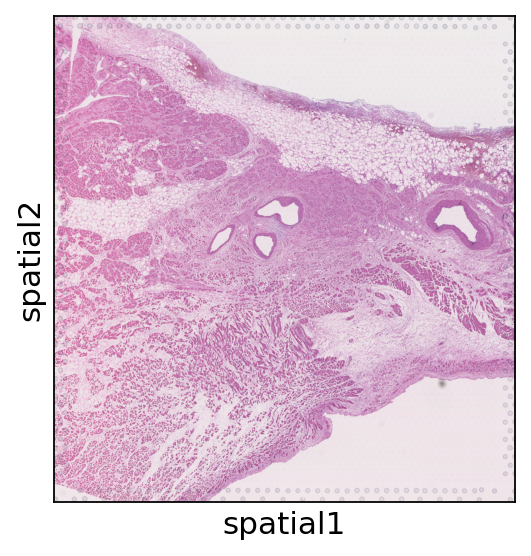

In [3]:
# Load the training data
adata = sc.read_h5ad(os.path.join(data_path, 'validation_data', 'HCAHeartST11702009.h5ad'))
genelist = list(np.load(os.path.join(data_path, 'validation_data', 'top300_gene_list.npy'),allow_pickle=True))
ad = adata[:, adata.var_names.isin(genelist)]
sc.pl.spatial(adata, img_key="hires", show=False, spot_size=10)
del adata
# Load the validation data
val_df = pd.read_csv(os.path.join(data_path, 'validation_data', 'val_df.csv'), index_col=0)
val_spots = val_df.index.tolist()
print(val_df.head())

## Loki PredEx by H&E image
Use Loki PredEx to predict ST gene expression from H&E image.

## Load and viz arrays

In [6]:
data_path = './loki_predex/'

In [7]:
import numpy as np
import os
# array of combined expression matrix
combined_expression_array = np.load(os.path.join(data_path, 'training_data', 'combined_expression_matrix.npy'))
combined_expression_array[:10]

array([[0.       , 0.       , 3.0384054, ..., 0.       , 1.6893549,
        0.       ],
       [0.       , 0.       , 2.4598298, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.7140973, 1.7140973,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 2.3340514,
        0.       ],
       [0.       , 0.       , 1.696776 , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.5082129, ..., 0.       , 2.0840929,
        0.       ]], dtype=float32)

In [8]:
combined_expression_array.shape

(97060, 17922)

In [9]:
combined_obs_array = np.load(os.path.join(data_path,'training_data', 'combined_obs.npy'))
combined_obs_array[:10]

array(['HCAHeartST9383353_AAACAAGTATCTCCCA-1',
       'HCAHeartST9383353_AAACCCGAACGAAATC-1',
       'HCAHeartST9383353_AAACGAGACGGTTGAT-1',
       'HCAHeartST9383353_AAACTGCTGGCTCCAA-1',
       'HCAHeartST9383353_AAAGGCTACGGACCAT-1',
       'HCAHeartST9383353_AAAGGCTCTCGCGCCG-1',
       'HCAHeartST9383353_AAAGTGTGATTTATCT-1',
       'HCAHeartST9383353_AAAGTTGACTCCCGTA-1',
       'HCAHeartST9383353_AAATACCTATAAGCAT-1',
       'HCAHeartST9383353_AAATAGCTTAGACTTT-1'], dtype='<U37')

In [10]:
print(combined_obs_array.shape)

(97060,)


In [11]:
train_df = pd.read_csv(os.path.join(data_path, 'training_data', 'train_df.csv'), index_col=0)
print(train_df.head())

                                                                                  label  \
Unnamed: 0                                                                                
HCAHeartST9383353_AAACAAGTATCTCCCA-1  NPPA MYH6 MYL7 TNNT2 DES MB PTGDS MYL4 CRYAB T...   
HCAHeartST9383353_AAACCCGAACGAAATC-1  NPPA MYH6 MB MYL7 PTGDS PAM GPX3 TNNT2 ACTC1 T...   
HCAHeartST9383353_AAACGAGACGGTTGAT-1  NPPA MYL7 MYH6 GPX3 MB MYL4 DES FBLN1 TCAP MYL...   
HCAHeartST9383353_AAACTGCTGGCTCCAA-1  NPPA MYH6 MYL7 MYL4 MB DES PTGDS TNNT2 GPX3 DK...   
HCAHeartST9383353_AAAGGCTACGGACCAT-1  NPPA MYH6 MYL7 GSN MYH7 DES PTGDS ACTC1 CRYAB ...   

                                            sample_name  \
Unnamed: 0                                                
HCAHeartST9383353_AAACAAGTATCTCCCA-1  HCAHeartST9383353   
HCAHeartST9383353_AAACCCGAACGAAATC-1  HCAHeartST9383353   
HCAHeartST9383353_AAACGAGACGGTTGAT-1  HCAHeartST9383353   
HCAHeartST9383353_AAACTGCTGGCTCCAA-1  HCAHeartST9383353   
HCAHeart

In [12]:
print(train_df['sample_name'].unique())

['HCAHeartST9383353' 'HCAHeartST13233999' 'HCAHeartST13233998'
 'HCAHeartST9383352' 'HCAHeartST10550732' 'HCAHeartST8795937'
 'HCAHeartST11350377' 'HCAHeartST8795940' 'HCAHeartST9383355'
 'HCAHeartST9383354' 'HCAHeartST11702008' 'HCAHeartST9383358'
 'HCAHeartST11290658' 'HCAHeartST8795936' 'HCAHeartST13228106'
 'HCAHeartST11290662' 'HCAHeartST11350375' 'HCAHeartST9341984'
 'HCAHeartST8795935' 'HCAHeartST12992074' 'HCAHeartST11290657'
 'HCAHeartST8795939' 'HCAHeartST8795938' 'HCAHeartST12992075'
 'HCAHeartST9383356' 'HCAHeartST12992072' 'HCAHeartST13233997'
 'HCAHeartST10238252' 'HCAHeartST9341982' 'HCAHeartST13228103'
 'HCAHeartST8795933' 'HCAHeartST9341983' 'HCAHeartST10238253'
 'HCAHeartST13233996' 'HCAHeartST10550730']


In [13]:
# Compare indices of train_df and val_df
train_indices_set = set(train_df.index)
val_indices_set = set(val_df.index)

common_indices = train_indices_set.intersection(val_indices_set)
only_in_train = train_indices_set - val_indices_set
only_in_val = val_indices_set - train_indices_set

print(f"Number of common indices: {len(common_indices)}")
print(f"Number of indices only in train_df: {len(only_in_train)}")
print(f"Number of indices only in val_df: {len(only_in_val)}")

Number of common indices: 0
Number of indices only in train_df: 84755
Number of indices only in val_df: 9453


## Get train_data

In [14]:
train_spots = train_df.index.tolist()
with open(os.path.join(data_path, 'training_data', 'all_shared_genes.txt'), 'r') as f:
    shared_genes = [line.strip() for line in f]
    print("Shared genes:", shared_genes[:10])  # Print first 10 shared genes for verification

train_indices = np.isin(combined_obs_array, train_spots) # list of spot ids that are in the training set
val_indices = np.isin(combined_obs_array, val_spots)

train_data = combined_expression_array[train_indices, :] # Extract the training data based on the indices
val_data = combined_expression_array[val_indices, :]

# del combined_expression_array
# del train_df

Shared genes: ['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC']


In [26]:
len(shared_genes)

17922

In [20]:
train_data.shape

(84755, 17922)

In [15]:
image_text_similarity = np.load(os.path.join(data_path, 'similarity_matrix', 'image_text_similarity.npy'))
image_text_similarity[:10]

array([[0.22911865, 0.28868622, 0.19927621, ..., 0.10561705, 0.24215454,
        0.26622796],
       [0.21768026, 0.21906473, 0.18510401, ..., 0.20621452, 0.24884713,
        0.32361475],
       [0.16093536, 0.26519412, 0.30738926, ..., 0.1483461 , 0.18420431,
        0.23854738],
       ...,
       [0.20244393, 0.2440985 , 0.11864491, ..., 0.10350043, 0.1972047 ,
        0.22815847],
       [0.22626501, 0.27766567, 0.18806997, ..., 0.12961562, 0.20091188,
        0.2536223 ],
       [0.22986352, 0.27471304, 0.33061683, ..., 0.13561143, 0.19841158,
        0.23592399]], dtype=float32)

In [21]:
image_text_similarity.shape

(9453, 84755)

In [22]:
def predict_st_gene_expr(image_text_similarity, train_data):
    """
    Predicts ST gene expression by H&E image.

    :param image_text_similarity: Numpy array of similarities between images and text features (shape: [n_samples, n_genes]).
    :param train_data: Numpy array or DataFrame of training data used for making predictions (shape: [n_genes, n_shared_genes]).
    :return: Numpy array or DataFrame containing the predicted gene expression levels for the samples.
    """
    
    # Compute the weighted sum of the train_data using image_text_similarity
    weighted_sum = image_text_similarity @ train_data
    print(f"Weighted sum shape: {weighted_sum.shape}, Train data shape: {train_data.shape}")
    
    # Compute the normalization factor (sum of the image-text similarities for each sample)
    weights = image_text_similarity.sum(axis=1, keepdims=True)
    print(f"Weights shape: {weights.shape}, image_text_similarity shape: {image_text_similarity.shape}")
    
    # Normalize the predicted matrix to get weighted gene expression predictions
    predicted_image_text_matrix = weighted_sum / weights
    print(f"Predicted image-text matrix shape: {predicted_image_text_matrix.shape}")

    return predicted_image_text_matrix


In [ ]:
# predicted_image_text_matrix = loki.predex.predict_st_gene_expr(image_text_similarity, train_data)
predicted_image_text_matrix = predict_st_gene_expr(image_text_similarity, train_data)
prediction = pd.DataFrame(predicted_image_text_matrix, index=val_df.index,columns=shared_genes)
predict_data = prediction[genelist]
predict_data = predict_data.loc[ad.obs_names]
predict_data

Weighted sum shape: (9453, 17922), Train data shape: (84755, 17922)
Weights shape: (9453, 1), image_text_similarity shape: (9453, 84755)
Predicted image-text matrix shape: (9453, 17922)


,APLP2,BEX3,KIF1C,NFKBIA,NUCB1,JUN,PSMD8,PTGES3,EEF1B2,HADHA,...,TTN,CRYAB,DES,MYH6,TNNT2,TPM1,MYL7,ACTC1,MB,NPPA
spot_id,,,,,,,,,,,,,,,,,,,,,
HCAHeartST11702009_AAACAACGAATAGTTC-1,0.873993,0.570633,0.809642,0.502104,0.748403,0.493271,0.748796,0.549227,0.932378,1.023527,...,3.124239,3.412882,3.790172,2.929567,3.479691,3.594159,3.225036,3.629995,4.128862,3.029146
HCAHeartST11702009_AAACAAGTATCTCCCA-1,0.886108,0.600569,0.823686,0.526465,0.767610,0.504052,0.797189,0.567454,0.975902,1.036880,...,3.118220,3.477846,3.808141,2.917475,3.476102,3.638909,3.224684,3.681861,4.140284,3.016911
HCAHeartST11702009_AAACACCAATAACTGC-1,0.888326,0.585750,0.832512,0.477843,0.753783,0.492416,0.765825,0.541675,0.917877,1.077905,...,3.162874,3.472019,3.868769,2.871715,3.553462,3.674515,3.118480,3.696731,4.202583,2.791825
HCAHeartST11702009_AAACAGAGCGACTCCT-1,0.856133,0.540058,0.783130,0.480710,0.730232,0.474532,0.718386,0.533095,0.908748,1.009165,...,3.102248,3.388016,3.767592,2.832029,3.452922,3.571325,3.136117,3.597626,4.109610,2.900072
HCAHeartST11702009_AAACAGCTTTCAGAAG-1,0.874205,0.568552,0.813926,0.492851,0.746464,0.484543,0.756364,0.541125,0.933276,1.039305,...,3.139338,3.427376,3.812936,2.882198,3.484469,3.606929,3.169057,3.631086,4.145370,2.900764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCAHeartST11702009_TTGTTGTGTGTCAAGA-1,0.894089,0.579133,0.829608,0.511592,0.768178,0.499198,0.772890,0.574577,0.942140,1.041307,...,3.096955,3.393777,3.846848,2.862901,3.527896,3.593798,3.242398,3.615205,4.115739,2.915658
HCAHeartST11702009_TTGTTTCACATCCAGG-1,0.892658,0.595588,0.840894,0.474780,0.756745,0.500931,0.773873,0.546936,0.911552,1.095048,...,3.193940,3.510114,3.897341,2.844283,3.585432,3.717604,3.070819,3.733671,4.232880,2.710185
HCAHeartST11702009_TTGTTTCATTAGTCTA-1,0.885468,0.584947,0.826959,0.487564,0.755718,0.489815,0.775464,0.542257,0.937204,1.073277,...,3.143953,3.479611,3.848483,2.857775,3.520583,3.666856,3.107396,3.691140,4.184915,2.785052


In [24]:
print(prediction.shape)

(9453, 17922)


In [17]:
ad.layers['original'] = ad.X
ad.layers['loki'] = predict_data

/tmp/ipykernel_123972/3605322198.py:1: ImplicitModificationWarning: Setting element `.layers['original']` of view, initializing view as actual.
  ad.layers['original'] = ad.X


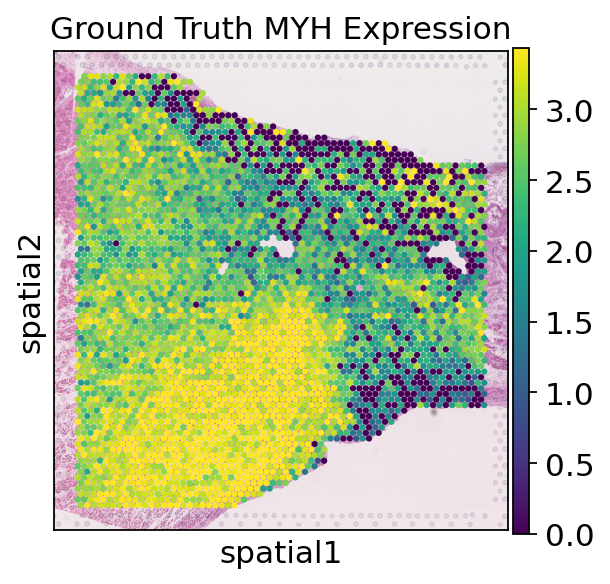

In [18]:
ad.X=ad.layers['original'] 
sc.pl.spatial(ad, img_key="hires", color='MYH7', size=1.5, vmax='p90', vmin='p10', title='Ground Truth MYH Expression')

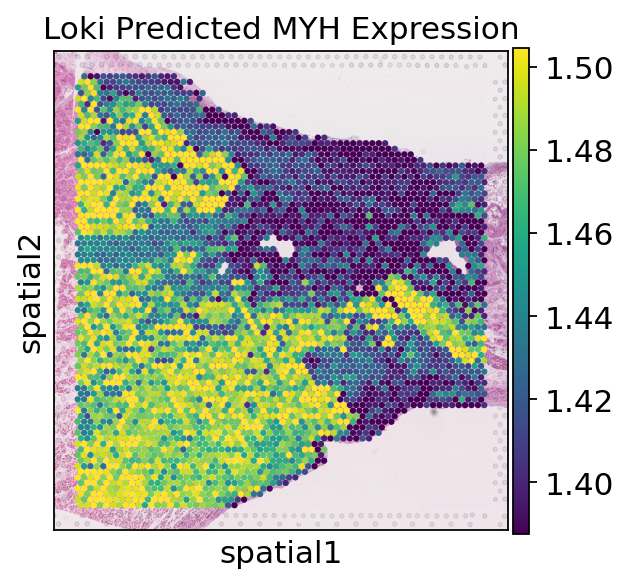

In [19]:
ad.X = ad.layers['loki']
sc.pl.spatial(ad, img_key="hires", color='MYH7', size=1.5, vmax='p90', vmin='p10', title='Loki Predicted MYH Expression')